In [513]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [514]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel Camargo\Documents\Insper - Engenharia\Ciência dos Dados\PNAD DOM2013\DOM2013csv


In [515]:
base = pd.read_csv('DOM2013.csv',sep=',')
base09 = pd.read_csv('DOM2009.csv',sep=',')

In [516]:
#MUDANÇA DA VARIÁVEL INICIAL QUE MOSTRA O ANO DE PESQUISA
base.V0101=base.V0101.astype("int")

In [517]:
#DEFINIÇÃO DAS REGIOES
base.loc[(base.UF<18),"REGIAO"]="NORTE"
base.loc[(base.UF>20)&(base.UF<30),"REGIAO"]="NORDESTE"
base.loc[(base.UF>30)&(base.UF<36),"REGIAO"]="SUDESTE"
base.loc[(base.UF>35)&(base.UF<44),"REGIAO"]="SUL"
base.loc[(base.UF>43)&(base.UF<54),"REGIAO"]="CENTRO-OESTE"
base.REGIAO=base.REGIAO.astype("category")

In [518]:
#DIVISÃO EM ZONA RURAL E URBANA
base.loc[(base.V4105<4),"ZONA"]="Urbana"
base.loc[(base.V4105>3),"ZONA"]="Rural"
base.ZONA=base.ZONA.astype("category")

In [519]:
#CATEGORIZAÇÃO DA RENDA PER CAPITA
base.V4622=base.V4622.astype("category")
base.V4622.cat.categories=("SEM RENDIMENTO","ATÉ 0,25SM","ENTRE 0,25SM E 0,5SM","ENTRE 0,5SM E 1SM","ENTRE 1SM E 2SM","ENTRE 2SM E 3SM","ENTRE 3SM E 5SM","MAIS DE 5SM","SEM DECLARAÇÃO")

In [520]:
#PERGUNTAS INICIAIS DE DIFICULDADE PARA SE ALIMENTAR
#base=base[(base.V2103==1)|(base.V2105==1)|(base.V2107==1)|(base.V2109==1)]
base.loc[(base.V2103==1) | (base.V2105==1) | (base.V2107==1) | (base.V2109==1),'Insegurança_Alimentar'] = 'Sim'
base.loc[(base.V2103==3) & (base.V2105==3) & (base.V2107==3) & (base.V2109==3),'Insegurança_Alimentar'] = 'Não'
base.V2103=base.V2103.astype("category")
base.V2105=base.V2105.astype("category")
base.V2107=base.V2107.astype("category")
base.V2109=base.V2109.astype("category")
#base.V2103.cat.categories=("SIM","NÃO")
#base.V2105.cat.categories=("SIM","NÃO")
#base.V2107.cat.categories=("SIM","NÃO")
#base.V2109.cat.categories=("SIM","NÃO")
#base=base[(base.V2113==1)|(base.V2115==1)|(base.V2117==1)|(base.V2121==1)]
base.loc[(base.V2113==1) | (base.V2115==1) | (base.V2117==1) | (base.V2121==1),'Problema_Alimentar'] = 'Sim'
base.loc[(base.V2113==3) & (base.V2115==3) & (base.V2117==3) & (base.V2121==3),'Problema_Alimentar'] = 'Não'
base.V2113=base.V2113.astype("category")
base.V2115=base.V2115.astype("category")
base.V2117=base.V2117.astype("category")
base.V2121=base.V2121.astype("category")
base=base.loc[:,["V0101","REGIAO","ZONA","V4622",'Insegurança_Alimentar',"Problema_Alimentar"]]
base.columns=["ANO","REGIAO","ZONA","RENDA_PER_CAPITA",'Insegurança_Alimentar',"Problema_Alimentar"]
base=base.dropna(subset=["Insegurança_Alimentar"])
base

,ANO,REGIAO,ZONA,RENDA_PER_CAPITA,Insegurança_Alimentar,Problema_Alimentar
2,2013,NORTE,Urbana,"ENTRE 0,5SM E 1SM",Não,NaN
3,2013,NORTE,Urbana,"ENTRE 0,25SM E 0,5SM",Não,NaN
4,2013,NORTE,Urbana,"ENTRE 0,25SM E 0,5SM",Não,NaN
5,2013,NORTE,Urbana,"ENTRE 0,5SM E 1SM",Não,NaN
6,2013,NORTE,Urbana,"ENTRE 0,5SM E 1SM",Não,NaN
7,2013,NORTE,Urbana,ENTRE 1SM E 2SM,Não,NaN
8,2013,NORTE,Urbana,ENTRE 2SM E 3SM,Não,NaN
9,2013,NORTE,Urbana,ENTRE 1SM E 2SM,Não,NaN
10,2013,NORTE,Urbana,"ENTRE 0,25SM E 0,5SM",Sim,Não
11,2013,NORTE,Urbana,"ENTRE 0,25SM E 0,5SM",Não,NaN


Pessoas que já se sentiram inseguras quanto à alimentação:
Não    76.2
Sim    23.8
Name: Insegurança_Alimentar, dtype: float64 



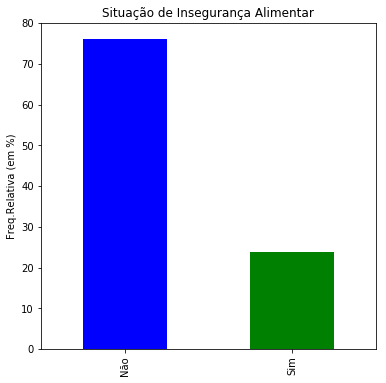

In [521]:
print('Pessoas que já se sentiram inseguras quanto à alimentação:')
ut1 = (base.Insegurança_Alimentar.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')
plot = ut1.plot(kind='bar',title='Situação de Insegurança Alimentar',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')

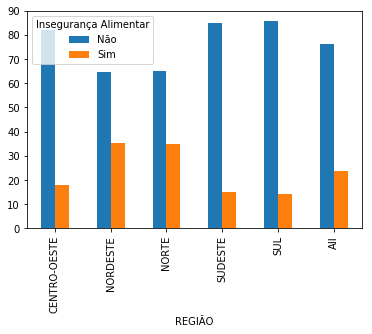

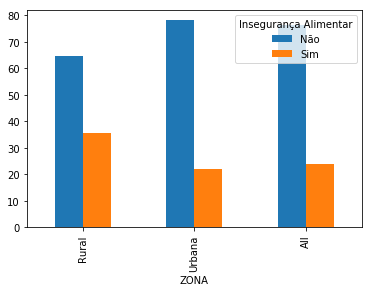

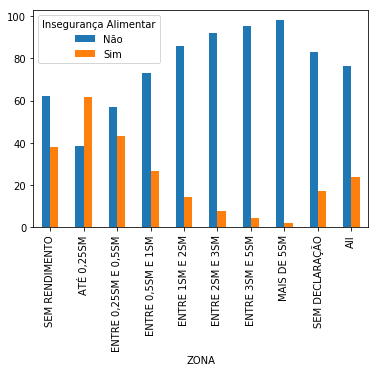

In [522]:
tb1= (pd.crosstab(base.REGIAO,base.Insegurança_Alimentar,margins=True,rownames=["REGIÃO"],colnames=["Insegurança Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb1.plot(kind="bar")

tb2 = (pd.crosstab(base.ZONA,base.Insegurança_Alimentar,margins=True,rownames=["ZONA"],colnames=["Insegurança Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb2.plot(kind="bar")

tb3 = (pd.crosstab(base.RENDA_PER_CAPITA,base.Insegurança_Alimentar,margins=True,rownames=["ZONA"],colnames=["Insegurança Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb3.plot(kind="bar")

In [523]:
abs1=pd.crosstab(base.REGIAO,base.Insegurança_Alimentar, margins=True, rownames=['REGIÃO'], colnames=['INSEGURANÇA ALIMENTAR'])
abs1=abs1.loc[['NORTE','NORDESTE','SUDESTE','SUL','CENTRO-OESTE']]
abs1


INSEGURANÇA ALIMENTAR,Não,Sim,All
REGIÃO,,,
NORTE,10870,5886,16756
NORDESTE,20899,11470,32369
SUDESTE,30085,5313,35398
SUL,16760,2811,19571
CENTRO-OESTE,10233,2216,12449


In [524]:
fre1 = (pd.crosstab(base.REGIAO,base.Insegurança_Alimentar, margins=True, rownames=['REGIÃO'], colnames=['INSEGURANÇA ALIMENTAR'],normalize='index')*100).round(decimals=1)
fre1

INSEGURANÇA ALIMENTAR,Não,Sim
REGIÃO,,
CENTRO-OESTE,82.2,17.8
NORDESTE,64.6,35.4
NORTE,64.9,35.1
SUDESTE,85.0,15.0
SUL,85.6,14.4
All,76.2,23.8


In [525]:
abs2=pd.crosstab(base.ZONA,base.Insegurança_Alimentar, margins=True, rownames=['ZONA'], colnames=['INSEGURANÇA ALIMENTAR'])
abs2=abs2.loc[['Rural','Urbana']]
abs2

INSEGURANÇA ALIMENTAR,Não,Sim,All
ZONA,,,
Rural,10427,5745,16172
Urbana,78420,21951,100371


In [526]:
fre3 = (pd.crosstab(base.ZONA,base.Insegurança_Alimentar, margins=True, rownames=['ZONA'], colnames=['INSEGURANÇA ALIMENTAR'],normalize='index')*100).round(decimals=1)
fre3

INSEGURANÇA ALIMENTAR,Não,Sim
ZONA,,
Rural,64.5,35.5
Urbana,78.1,21.9
All,76.2,23.8


In [527]:
abs3=pd.crosstab(base.RENDA_PER_CAPITA,base.Insegurança_Alimentar, margins=True, rownames=['Faixa de Renda'], colnames=['INSEGURANÇA ALIMENTAR'])
abs3=abs3.loc[["SEM RENDIMENTO","ATÉ 0,25SM","ENTRE 0,25SM E 0,5SM","ENTRE 0,5SM E 1SM","ENTRE 1SM E 2SM","ENTRE 2SM E 3SM","ENTRE 3SM E 5SM","MAIS DE 5SM","SEM DECLARAÇÃO"]]
abs3

INSEGURANÇA ALIMENTAR,Não,Sim,All
Faixa de Renda,,,
SEM RENDIMENTO,1342,823,2165
"ATÉ 0,25SM",2796,4479,7275
"ENTRE 0,25SM E 0,5SM",9630,7299,16929
"ENTRE 0,5SM E 1SM",23838,8674,32512
ENTRE 1SM E 2SM,25692,4280,29972
ENTRE 2SM E 3SM,9124,791,9915
ENTRE 3SM E 5SM,6099,289,6388
MAIS DE 5SM,5757,116,5873
SEM DECLARAÇÃO,4569,945,5514


In [528]:
fre3 = (pd.crosstab(base.RENDA_PER_CAPITA,base.Insegurança_Alimentar, margins=True, rownames=['Faixa de Renda'], colnames=['INSEGURANÇA ALIMENTAR'],normalize='index')*100).round(decimals=1)
fre3

INSEGURANÇA ALIMENTAR,Não,Sim
Faixa de Renda,,
SEM RENDIMENTO,62.0,38.0
"ATÉ 0,25SM",38.4,61.6
"ENTRE 0,25SM E 0,5SM",56.9,43.1
"ENTRE 0,5SM E 1SM",73.3,26.7
ENTRE 1SM E 2SM,85.7,14.3
ENTRE 2SM E 3SM,92.0,8.0
ENTRE 3SM E 5SM,95.5,4.5
MAIS DE 5SM,98.0,2.0
SEM DECLARAÇÃO,82.9,17.1


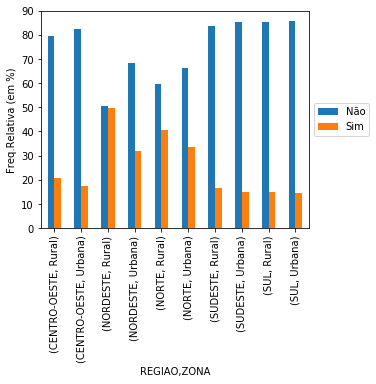

In [529]:
ct1=(pd.crosstab([base.REGIAO, base.ZONA],base.Insegurança_Alimentar, normalize='index')*100).round(decimals=1)
ct1
plot = ct1.plot(kind='bar')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [530]:
base=base[(base.Insegurança_Alimentar=="Sim")]
base

,ANO,REGIAO,ZONA,RENDA_PER_CAPITA,Insegurança_Alimentar,Problema_Alimentar
10,2013,NORTE,Urbana,"ENTRE 0,25SM E 0,5SM",Sim,Não
53,2013,NORTE,Urbana,SEM RENDIMENTO,Sim,Não
60,2013,NORTE,Urbana,ENTRE 1SM E 2SM,Sim,Não
61,2013,NORTE,Urbana,"ATÉ 0,25SM",Sim,Não
80,2013,NORTE,Urbana,"ENTRE 0,5SM E 1SM",Sim,Sim
81,2013,NORTE,Urbana,"ENTRE 0,25SM E 0,5SM",Sim,Sim
91,2013,NORTE,Urbana,"ATÉ 0,25SM",Sim,Não
93,2013,NORTE,Urbana,"ENTRE 0,5SM E 1SM",Sim,Não
94,2013,NORTE,Urbana,SEM DECLARAÇÃO,Sim,Não
95,2013,NORTE,Urbana,"ENTRE 0,5SM E 1SM",Sim,Não


Pessoas que já passaram por problema com alimentação:
Sim    35.2
Não    64.8
Name: Problema_Alimentar, dtype: float64 



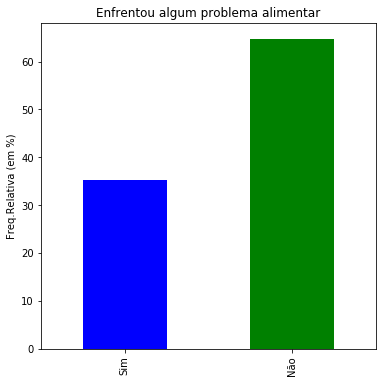

In [531]:
print('Pessoas que já passaram por problema com alimentação:')
ut2 = (base.Problema_Alimentar.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut2,'\n')
plot = ut2.plot(kind='bar',title='Enfrentou algum problema alimentar',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')

In [532]:
fre4 = (pd.crosstab(base.ZONA,base.Problema_Alimentar, margins=True, rownames=['ZONA'], colnames=['PROBLEMA ALIMENTAR'],normalize='index')*100).round(decimals=1)
fre4

PROBLEMA ALIMENTAR,Não,Sim
ZONA,,
Rural,61.6,38.4
Urbana,65.7,34.3
All,64.8,35.2


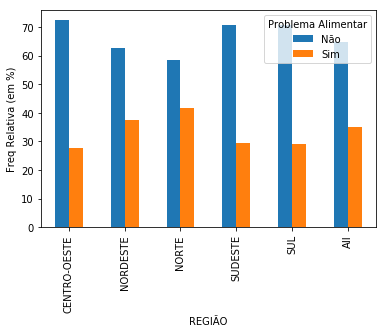

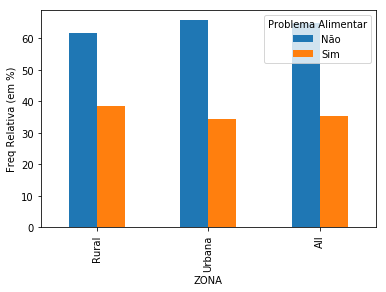

In [533]:
tb4= (pd.crosstab(base.REGIAO,base.Problema_Alimentar,margins=True,rownames=["REGIÃO"],colnames=["Problema Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb4.plot(kind="bar")
plt.ylabel("Freq Relativa (em %)")
tb5 = (pd.crosstab(base.ZONA,base.Problema_Alimentar,margins=True,rownames=["ZONA"],colnames=["Problema Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb5.plot(kind="bar")
plt.ylabel("Freq Relativa (em %)")


In [534]:
fre4 = (pd.crosstab(base.ZONA,base.Problema_Alimentar, margins=True, rownames=['ZONA'], colnames=['PROBLEMA ALIMENTAR'],normalize='index')*100).round(decimals=1)
fre4

PROBLEMA ALIMENTAR,Não,Sim
ZONA,,
Rural,61.6,38.4
Urbana,65.7,34.3
All,64.8,35.2


In [535]:
#Situação de Cada Região